# Problem Statement

**ENSEMBLE TECHNIQUES**

##You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

##Learning Outcomes

### Exploratory Data Analysis
### Data Visualization(Univariate and Bivariate analysis) 
### Preparing the data to train a model
### Training and making predictions using an Ensemble Model


## IMPORTING NECCESARY LIBRARIES

In [1]:
# Basic packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm
import matplotlib.style as style; style.use('fivethirtyeight')
import plotly.express as px
import io
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt   

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")



# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


## Upload the CSV file

In [2]:
#To upload the CSV file
from google.colab import files 


uploaded = files.upload() 

Saving Election_Data1.csv to Election_Data1 (2).csv


## Data Overview

In [3]:
df = pd.read_csv(io.BytesIO(uploaded['Election_Data1.csv'])) 

In [4]:
# Check number of rows and columns
df.shape 

(1525, 10)

In [5]:
print('The no. of rows is' ,df.shape[0], 'The no. of columns is', df.shape[1])

The no. of rows is 1525 The no. of columns is 10


In [6]:
df.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [8]:
# Are there any duplicates?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups] 

Number of duplicate rows = 0


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


### Dropping unnecessary column of dataset

In [9]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True) 

In [10]:
print(df.shape) 

(1525, 9)


## Info of the dataframe columns

In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


## Checking Top 5 rows of Dataset

In [12]:
df.head(5) 

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


## Description of dataset

In [13]:
df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### OBSERVATIONS

#### The no. of rows is 1525 The no. of columns is 9

####It has 7 categorical and 2 numerical attributes.

####The data frame contains no null values

FEATURE DESCRIPTION :

1. vote: Party choice: Conservative or Labour
		
2. age: in years	
		
3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.
		
4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.
		
5. Blair: Assessment of the Labour leader, 1 to 5.
		
6. Hague: Assessment of the Conservative leader, 1 to 5.
		
7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
		
8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 
		
9. gender: female or male.
		


## Exploratory Data Analysis

### Skewness of Dataset

In [14]:
from scipy.stats import skew
df.skew() 

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

### Missing Value in Dataset

In [15]:
df.isnull().sum() 

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

### Unique Values in Dataset 

In [16]:
columns = df.loc[:, df.dtypes == 'object'].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{df[cols].unique()}\n') 

Unique values for vote is 
['Labour' 'Conservative']

Unique values for gender is 
['female' 'male']



### Correlation between Dataset

In [17]:
df.corr() 

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


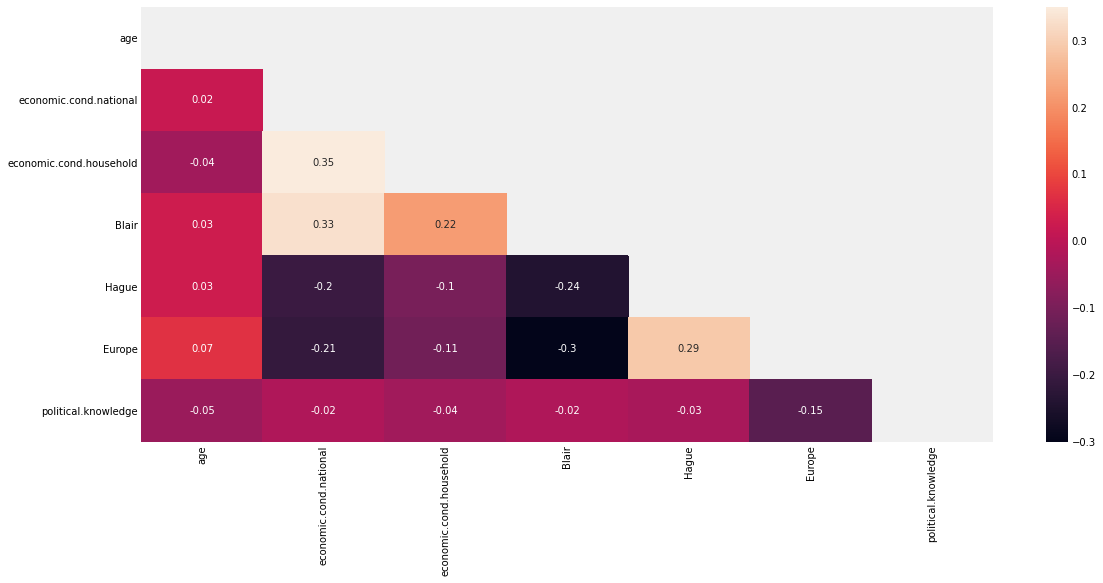

In [18]:
fig_dims = (17, 8)
fig = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool)) 
sns.heatmap(round(df.corr(),2), annot=True, mask=mask) 

### Outlier Detection 

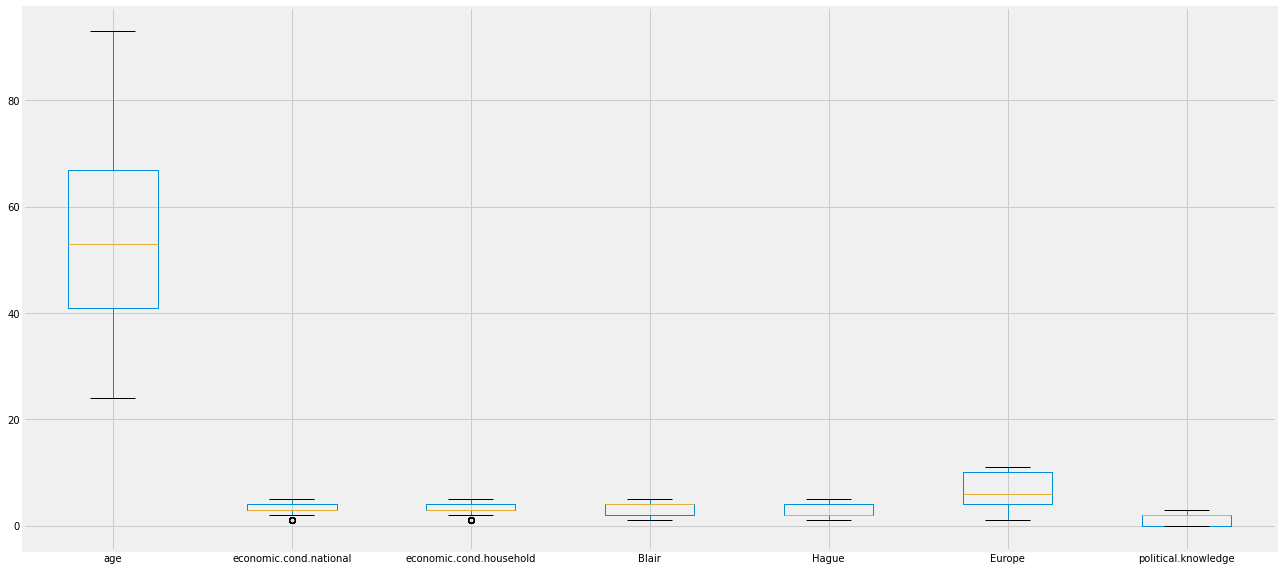

In [19]:
fig_dims = (20, 10)
df.boxplot(figsize=fig_dims) 

In [20]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


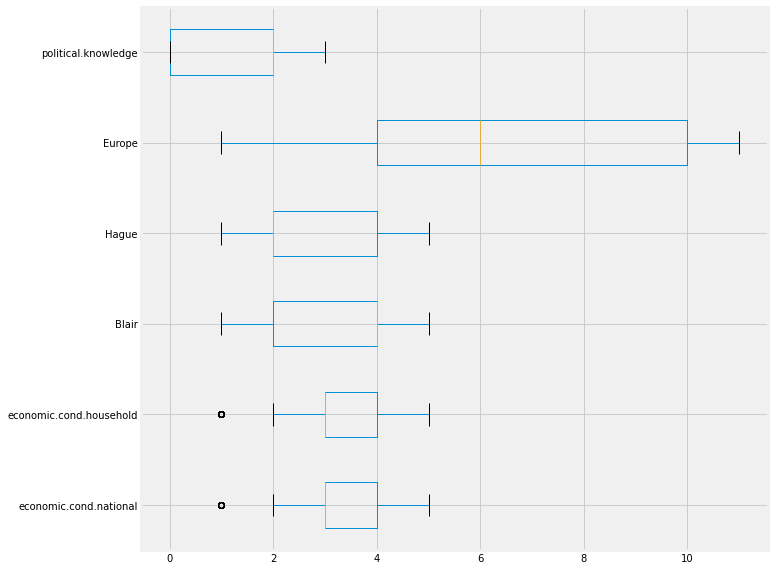

In [21]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df[num].drop('age', axis=1).boxplot(vert=0)
plt.show() 

#### There are few outliers in 'economic.cond.national', 'economic.cond.household' column

### Outlier Removal

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [23]:
for column in ['economic.cond.national', 'economic.cond.household']:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column]) 

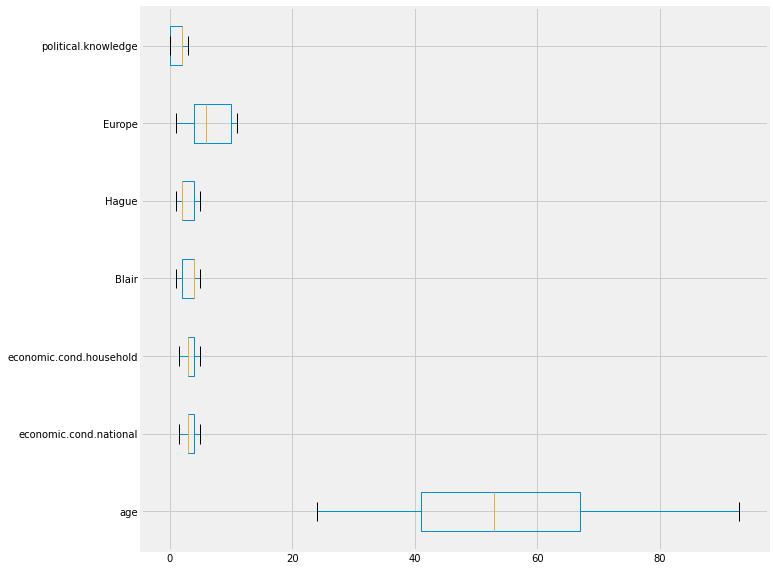

In [24]:
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0) 

### UNIVARIATE ANALYSIS

ValueError: ignored

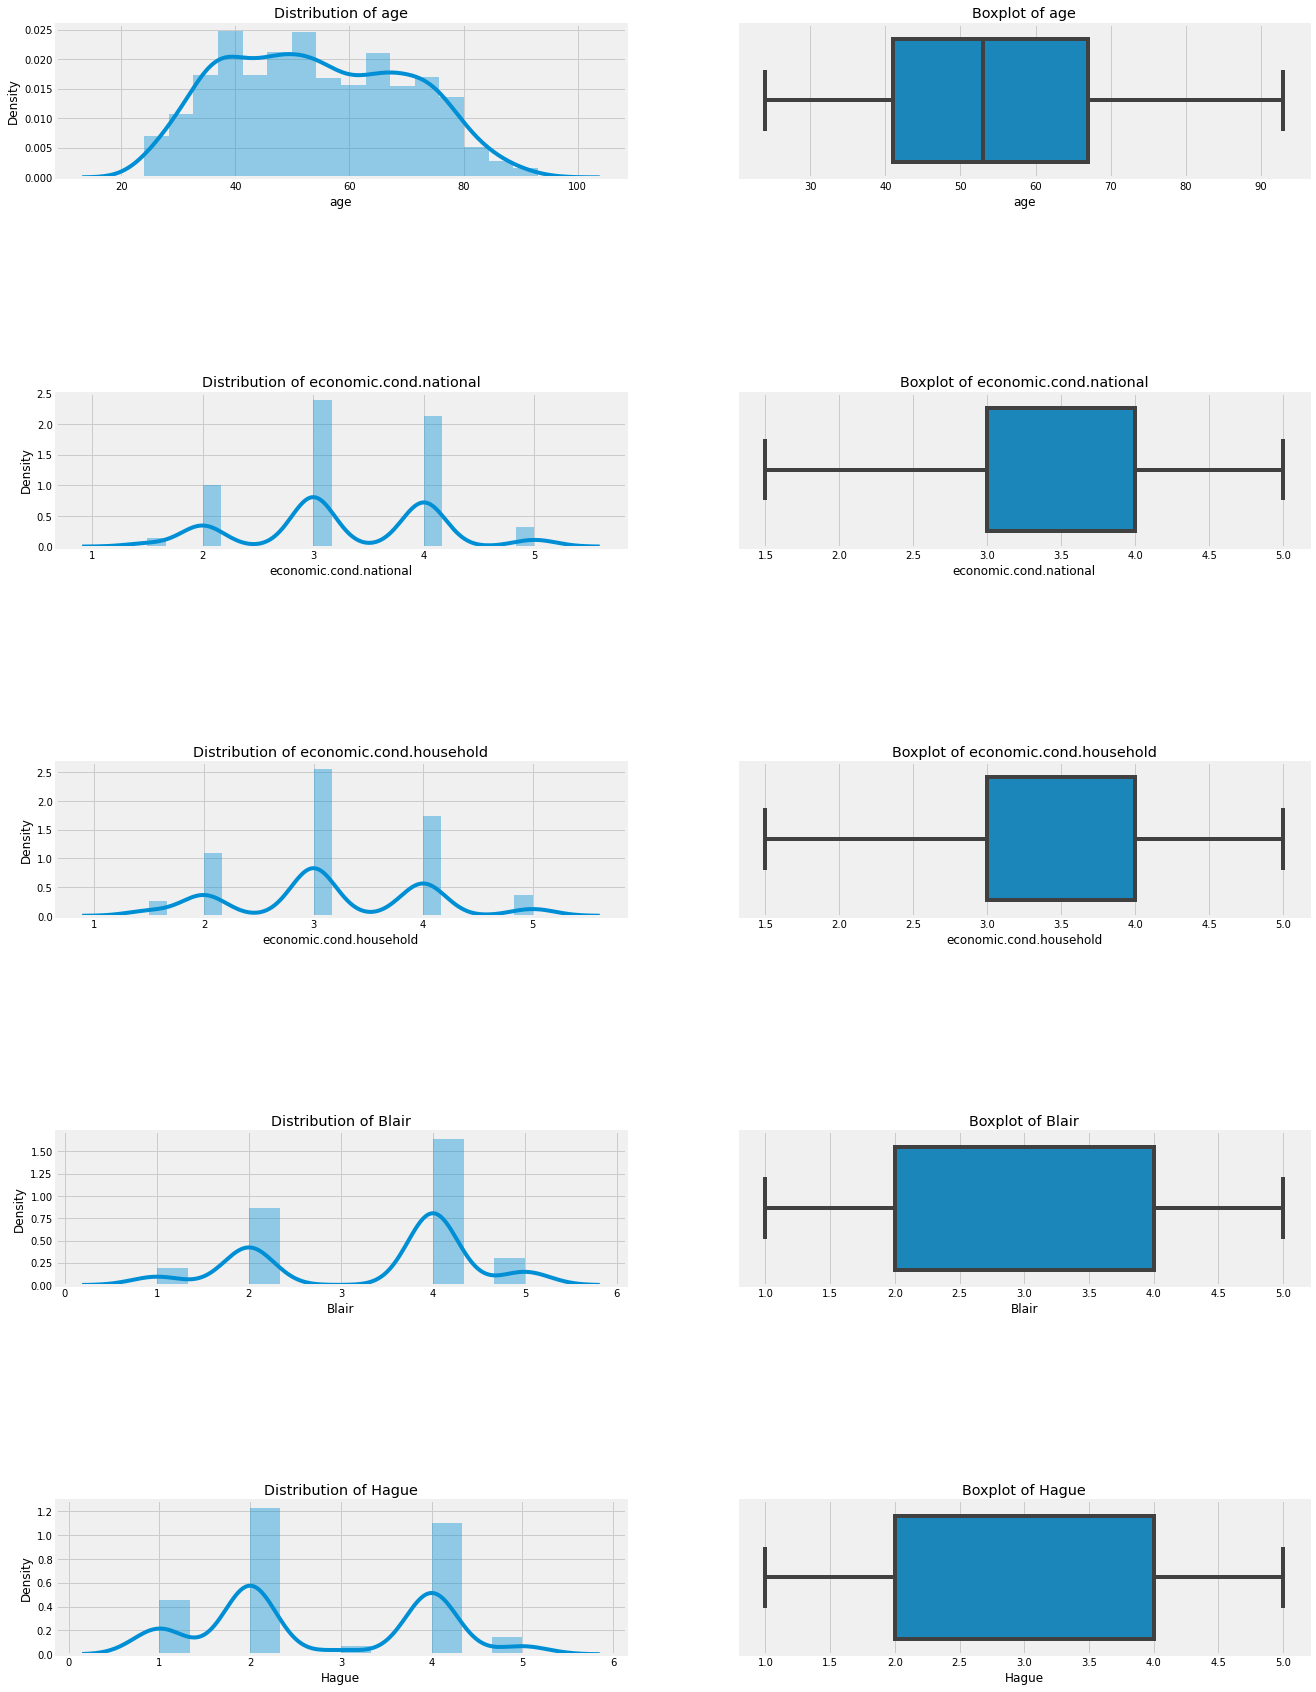

In [25]:
plt.figure(figsize=(20,30))
a = 1
for i in num:
    plt.subplot(9,2,a)
    sns.distplot(df[i])
    plt.title('Distribution of %s' % (i))
    plt.subplot(9,2,a+1)
    sns.boxplot(df[i])
    plt.title('Boxplot of %s' % (i))
    a += 4   

Text(0.5, 1.0, 'Vote count of each party')

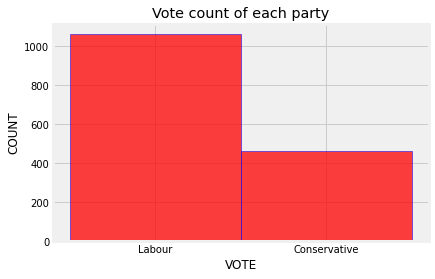

In [26]:
fig_dims = (10, 5)
sns.histplot(df.vote , color= 'r', edgecolor='b' )  
plt.xlabel("VOTE")
plt.ylabel("COUNT")
plt.title("Vote count of each party") 

Text(0.5, 1.0, ' the gender count distribution')

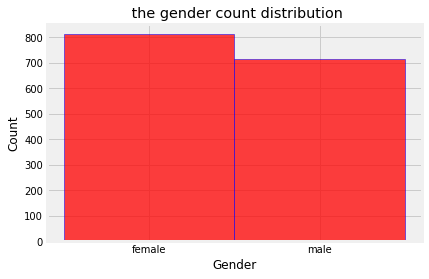

In [27]:
fig_dims = (10, 5)
sns.histplot(df.gender , color= 'r', edgecolor='b',  )  
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title(" the gender count distribution") 

### BIVARIATE ANALYSIS

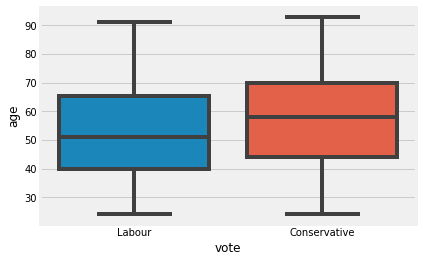

In [28]:
sns.boxplot( df['vote'], df['age']) 

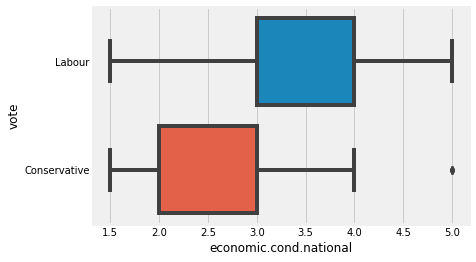

In [29]:
sns.boxplot( df['economic.cond.national'], df['vote']) 

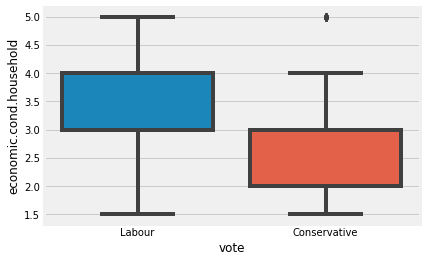

In [30]:
sns.boxplot( df['vote'], df['economic.cond.household']) 

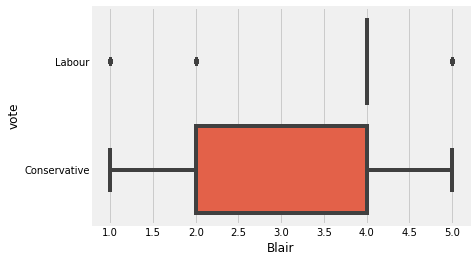

In [31]:
sns.boxplot(  df['Blair'],df['vote']) 

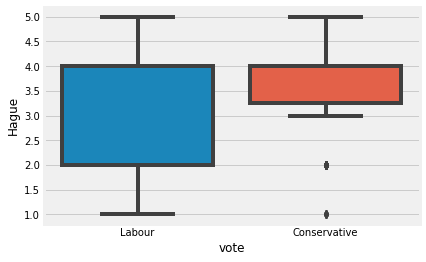

In [32]:
sns.boxplot( df['vote'], df['Hague']) 

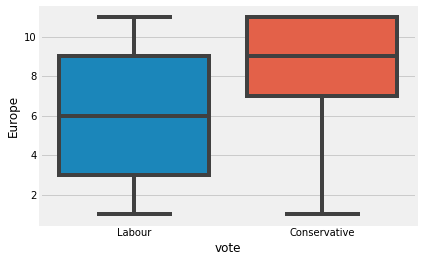

In [33]:
sns.boxplot( df['vote'], df['Europe']) 


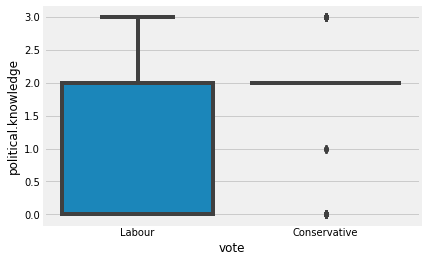

In [34]:
sns.boxplot( df['vote'], df['political.knowledge']) 

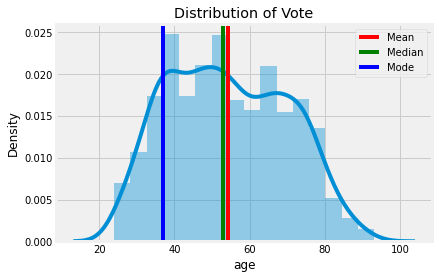

In [35]:
vote_mean = df['age'].mean()
vote_median = df['age'].median()
vote_mode = df['age'].mode()
fig_dims = (20,10)
ax_hist = sns.distplot(df['age'], kde=True)

ax_hist.axvline(vote_mean, color='r', label='Mean')
ax_hist.axvline(vote_median, color='g', label='Median')
ax_hist.axvline(vote_mode[0], color='b', label='Mode')
ax_hist.set_title('Distribution of Vote')

plt.legend(); plt.show(); 

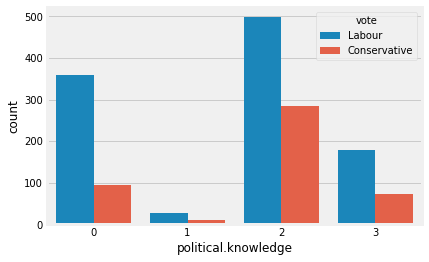

In [36]:
 sns.countplot(df['political.knowledge'], hue=df['vote']) 

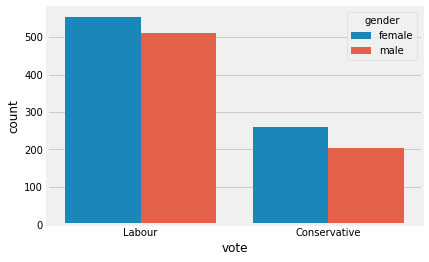

In [37]:
sns.countplot(df['vote'], hue=df['gender']) 

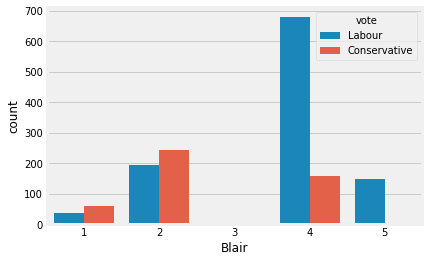

In [38]:
sns.countplot(df['Blair'], hue=df['vote']) 

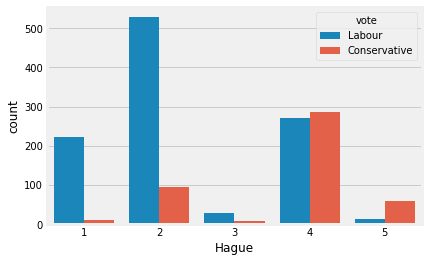

In [39]:
sns.countplot(df['Hague'], hue=df['vote']) 

### MULTIVARIATE ANALYSIS

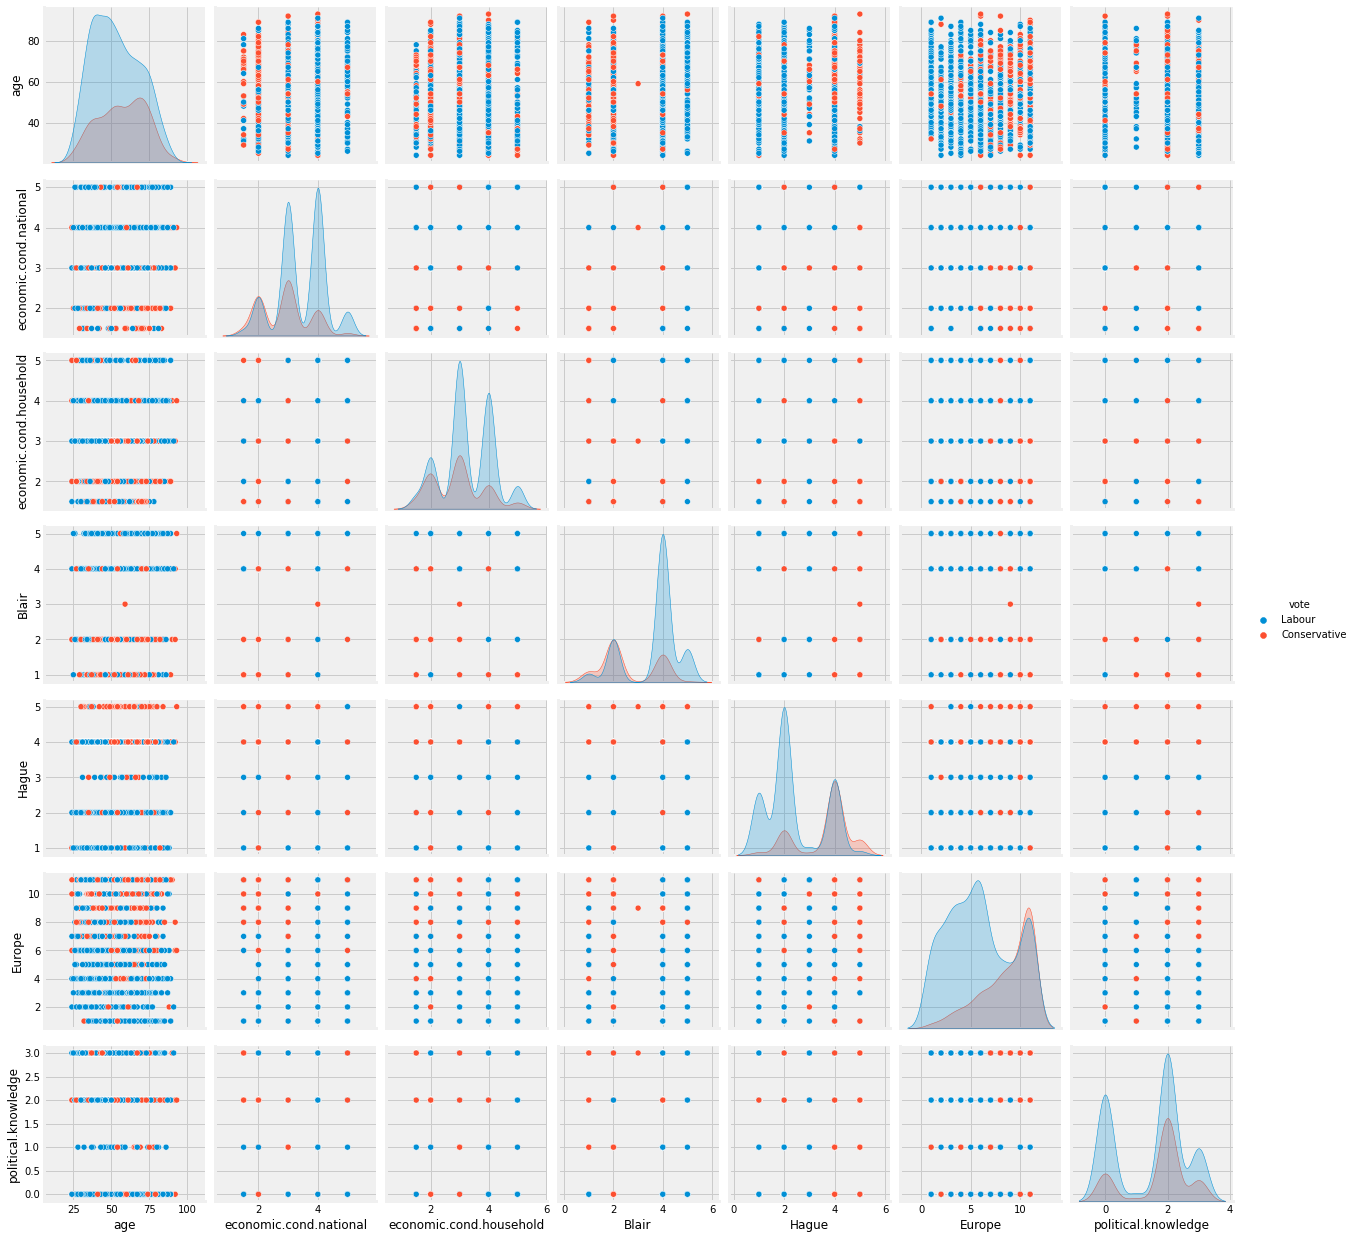

In [40]:
sns.pairplot(df, hue = 'vote') 

## Data Preparation - Scalling  & Encoding

### Scaling

**Scalling of Age column is neccessary since it has quite large numerical values as compared to other
columns.**

In [41]:
df.age.describe() 

count    1525.000000
mean       54.182295
std        15.711209
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64

In [42]:
num1=['age']
df[num1] = df[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
df.head() 

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,0.275362,3.0,3.0,4,1,2,2,female
1,Labour,0.173913,4.0,4.0,4,4,5,2,male
2,Labour,0.159420,4.0,4.0,5,2,3,2,male
3,Labour,0.000000,4.0,2.0,2,1,4,0,female
4,Labour,0.246377,2.0,2.0,1,1,6,2,male


In [43]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,1525.0,0.437425,0.227699,0.0,0.246377,0.42029,0.623188,1.0
economic.cond.national,1525.0,3.258033,0.852938,1.5,3.000000,3.00000,4.000000,5.0
economic.cond.household,1525.0,3.161639,0.885286,1.5,3.000000,3.00000,4.000000,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.000000,4.00000,4.000000,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.000000,2.00000,4.000000,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.000000,6.00000,10.000000,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.000000,2.00000,2.000000,3.0


### Encoding

<b>Encode the categorical variables. In case a column has more than 2 categories, use one-hot encoding.</b> 

#### 'vote', 'gender' columns have 2 unique values ,  hence we will do label encoding for it

In [44]:
# convert 'vote', 'gender'  column to a category, then use those category values for your label encoding:
df['vote'] =df['vote'].astype('category')
df['gender'] =df['gender'].astype('category')
df.dtypes 

vote                       category
age                         float64
economic.cond.national      float64
economic.cond.household     float64
Blair                         int64
Hague                         int64
Europe                        int64
political.knowledge           int64
gender                     category
dtype: object

In [45]:
df['vote'].value_counts() 

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [46]:
df['gender'].value_counts() 

female    812
male      713
Name: gender, dtype: int64

In [47]:
df['vote'] = df['vote'].cat.codes
df['gender'] = df['gender'].cat.codes 

In [48]:
df['vote'].value_counts()

1    1063
0     462
Name: vote, dtype: int64

In [49]:
df['gender'].value_counts() 

0    812
1    713
Name: gender, dtype: int64

# MODELLING

### Separate out the dependent variable(“vote”) from the independent

In [50]:
# Here we will assign the dependent variable “vote” to y variable while the rest independent variables excluding “vote”  will be assign to X variable. 
# independant variables
X = df.drop(['vote'], axis=1)
# the dependent variable
y = df[['vote']]


print(X.head())
print(y.head()) 

        age  economic.cond.national  ...  political.knowledge  gender
0  0.275362                     3.0  ...                    2       0
1  0.173913                     4.0  ...                    2       1
2  0.159420                     4.0  ...                    2       1
3  0.000000                     4.0  ...                    0       0
4  0.246377                     2.0  ...                    2       1

[5 rows x 8 columns]
   vote
0     1
1     1
2     1
3     1
4     1


In [51]:
print(X.shape)
print(y.shape) 

(1525, 8)
(1525, 1)


### Split Data

In [52]:
# Split X and y into training and test set in 70:30 ratio
# Sklearn package's randomized data splitting function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) 

## Fit Logistic Regression Model

In [53]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_


0.8187772925764192
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



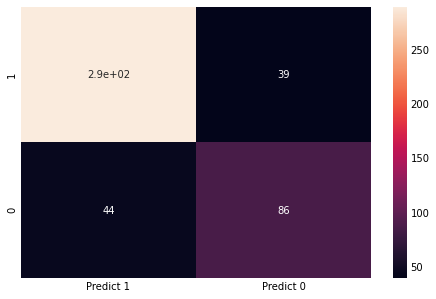

In [54]:
from sklearn import metrics
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_predict))
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True) 


AUC: 0.885


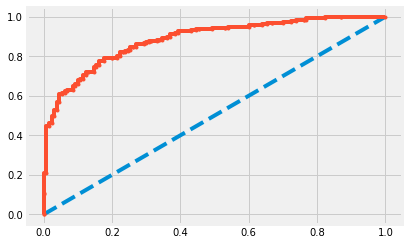

In [55]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show() 

### LR with Hyper Tuning

In [56]:

from sklearn.model_selection import  GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer
random_state = 42
np.random.seed(random_state) 

In [57]:
# LR with hyperparameter tuning
LR = LogisticRegression(n_jobs = -1, random_state = random_state)

params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 110, 120, 130, 140]}
scoring = {'Recall': make_scorer(recall_score), 'f1_score': make_scorer(f1_score)}

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = random_state)
LR_hyper = GridSearchCV(LR, param_grid = params, n_jobs = -1, cv = skf, scoring = scoring, refit = 'f1_score')

LR_hyper.fit(X_train, y_train)
print(LR_hyper.best_estimator_)
print(LR_hyper.best_params_) 

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}


0.8765060240963856
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



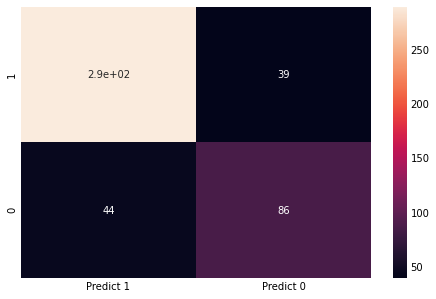

In [58]:
model_score = LR_hyper.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_predict))
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])



df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)



## Fit Naive Bayes Model

In [59]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

0.8322399250234301
[[240  92]
 [ 87 648]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



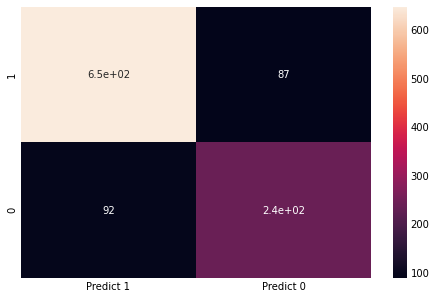

In [60]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict)) 
y_predict = NB_model.predict(X_train)
cm=metrics.confusion_matrix(y_train, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True) 

0.8231441048034934
[[ 94  36]
 [ 45 283]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



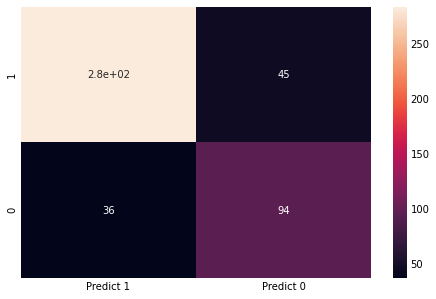

In [61]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict)) 
y_predict = NB_model.predict(X_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True) 

AUC: 0.885


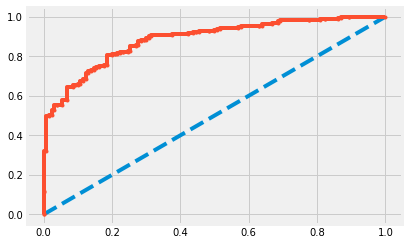

In [62]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show() 

## Fit KNN Model

In [63]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

0.8603561387066542
[[250  82]
 [ 67 668]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       332
           1       0.89      0.91      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



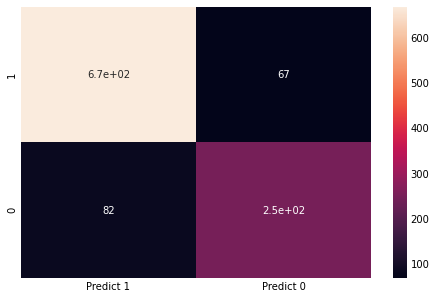

In [64]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
y_predict = KNN_model.predict(X_train)
cm=metrics.confusion_matrix(y_train, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True) 

0.8013100436681223
[[ 90  40]
 [ 51 277]]
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       130
           1       0.87      0.84      0.86       328

    accuracy                           0.80       458
   macro avg       0.76      0.77      0.76       458
weighted avg       0.81      0.80      0.80       458



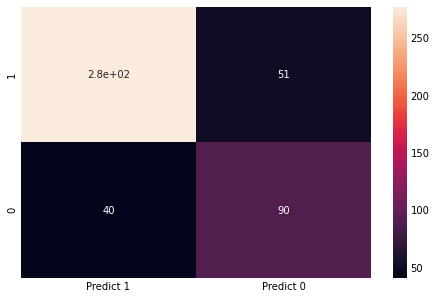

In [65]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
y_predict = KNN_model.predict(X_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)  

AUC: 0.861


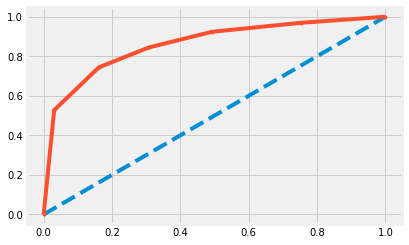

In [66]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show() 

### KNN with Hyper tuning

In [67]:
# KNN with hyperparameter tuning
kNN = KNeighborsClassifier(n_jobs = -1)

params = {'n_neighbors': list(range(3, 40, 2)), 'weights': ['uniform', 'distance']}

scoring = {'Recall': make_scorer(recall_score), 'f1_score': make_scorer(f1_score)}

skf = StratifiedKFold(n_splits = 3, shuffle = True, random_state = random_state)

kNN_hyper = GridSearchCV(kNN, param_grid = params, n_jobs = -1, cv = skf, scoring = scoring, refit = 'f1_score')

kNN_hyper.fit(X_train, y_train)
print(kNN_hyper.best_estimator_)
print(kNN_hyper.best_params_) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=27, p=2,
                     weights='uniform')
{'n_neighbors': 27, 'weights': 'uniform'}


0.8663594470046082
[[ 89  41]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       130
           1       0.87      0.86      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



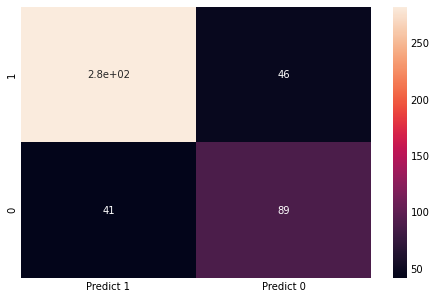

In [68]:
## Performance Matrix on test data set
y_test_predict = kNN_hyper.predict(X_test)
model_score = kNN_hyper.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict)) 
y_predict = kNN_hyper.predict(X_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True) 

## Bagging applied via Random Forest

In [69]:
RF_model=RandomForestClassifier(n_estimators=100,max_depth=15, min_samples_split=25,random_state=1)
RF_model.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

0.8744142455482662
[[242  90]
 [ 44 691]]
              precision    recall  f1-score   support

           0       0.85      0.73      0.78       332
           1       0.88      0.94      0.91       735

    accuracy                           0.87      1067
   macro avg       0.87      0.83      0.85      1067
weighted avg       0.87      0.87      0.87      1067



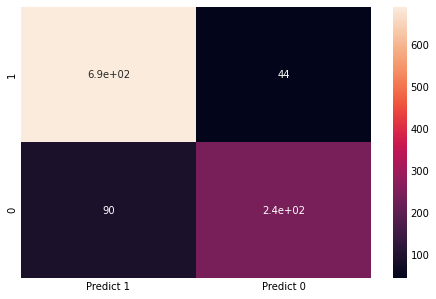

In [70]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict)) 
y_predict = RF_model.predict(X_train)
cm=metrics.confusion_matrix(y_train, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True) 

0.8275109170305677
[[ 85  45]
 [ 34 294]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       130
           1       0.87      0.90      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.78       458
weighted avg       0.82      0.83      0.83       458



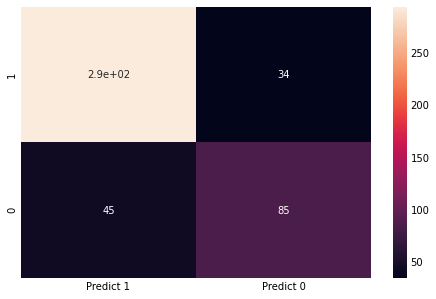

In [71]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
y_predict = RF_model.predict(X_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True) 

AUC: 0.897


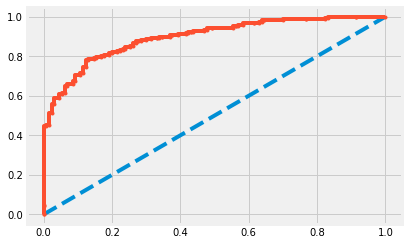

In [72]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show() 

### Random Forest with Hyper tunning

In [73]:

# Random Forest Classifier with hyperparameter tuning
rfc = RandomForestClassifier(n_jobs = -1, random_state = random_state)
params = {'n_estimators' : [10, 20, 30, 50, 75, 100], 'max_depth': [1, 2, 3, 5, 7, 10]}

scoring = {'Recall': make_scorer(recall_score), 'f1_score': make_scorer(f1_score)}

skf = StratifiedKFold(n_splits = 3, shuffle = True, random_state = random_state)

rfc_grid = GridSearchCV(rfc, param_grid = params, n_jobs = -1, cv = skf, scoring = scoring, refit = 'f1_score')
rfc_grid.fit(X_train, y_train)

print(rfc_grid.best_estimator_)
print(rfc_grid.best_params_) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
{'max_depth': 5, 'n_estimators': 75}


0.8825301204819277
[[ 87  43]
 [ 35 293]]
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       130
           1       0.87      0.89      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458



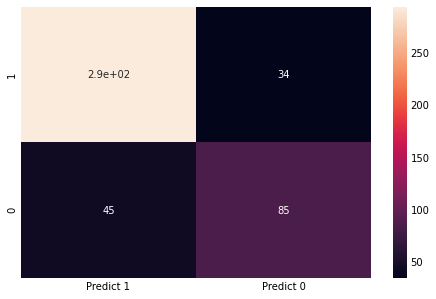

In [74]:
## Performance Matrix on test data set
y_test_predict = rfc_grid.predict(X_test)
model_score = rfc_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

y_predict = rfc_grid.predict(X_test)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True) 

## Ada Boosting

In [75]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=42)
ADB_model.fit(X_train,y_train) 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



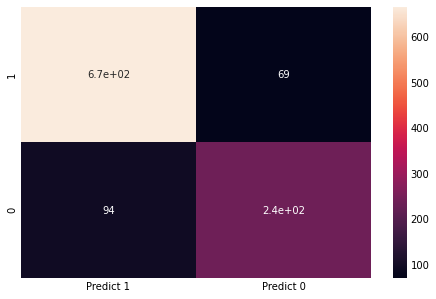

In [76]:
## Performance Matrix on train data set
from sklearn.metrics import roc_auc_score
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
y_predict = ADB_model.predict(X_train)
cm=metrics.confusion_matrix(y_train, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True) 


0.8187772925764192
[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



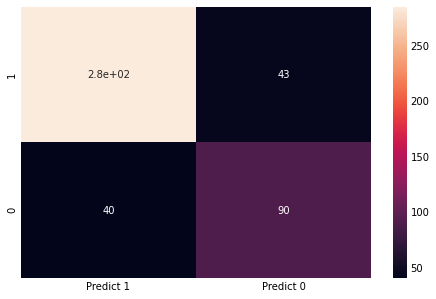

In [77]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
y_predict = ADB_model.predict(X_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)


AUC: 0.879


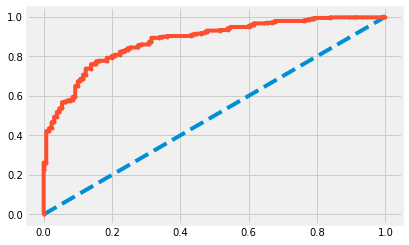

In [78]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show() 

## Gradient Boosting

In [79]:
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train) 

0.8865979381443299
[[262  70]
 [ 51 684]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



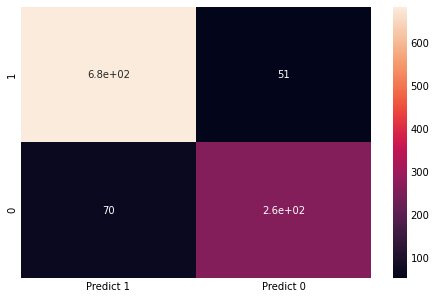

In [80]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
y_predict = gbcl.predict(X_train)
cm=metrics.confusion_matrix(y_train, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

0.8318777292576419
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



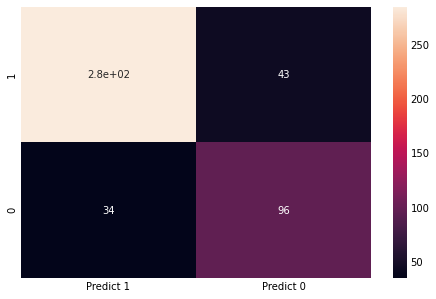

In [81]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
y_predict = gbcl.predict(X_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# AUC and ROC for the test data




AUC: 0.904


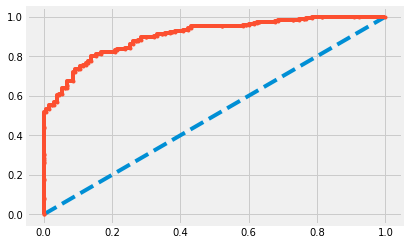

In [82]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show() 

# FINAL MODEL

## Ensembles with Stacking Classifiers

In [83]:
estimators=[('LR', model),('NB',NB_model), ('KNN', KNN_model), ('RF', RF_model),
          ('ADB', ADB_model), ('Gradient Boosting', gbcl)]

final_estimator=GradientBoostingClassifier() 

In [84]:
from sklearn.ensemble import StackingClassifier

stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
stacking_estimator.fit(X_train,y_train) 

StackingClassifier(cv=5,
                   estimators=[('LR',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='liblinear',
                                                   tol=0.0001, verbose=0,
                                                   warm_start=False)),
                               ('NB',
                                GaussianNB(priors=None, var_smoothing=1e-09)),
                      

0.8013100436681223
[[ 84  46]
 [ 45 283]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       130
           1       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.76      0.75      0.76       458
weighted avg       0.80      0.80      0.80       458



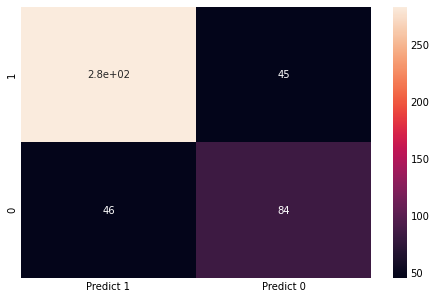

In [85]:
y_pred = stacking_estimator.predict(X_test)
model_score = stacking_estimator.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True) 

In [86]:
y_pred_prob = stacking_estimator.predict_proba(X_test)
y_pred_prob = pd.DataFrame(y_pred_prob)
y_pred_prob.head() 

,0,1
0,0.912637,0.087363
1,0.963512,0.036488
2,0.291345,0.708655
3,0.513604,0.486396
4,0.136127,0.863873


In [87]:
y_pred_class = np.where(y_pred_prob[1]>0.1, 1, 0)
print(metrics.classification_report(y_test, y_pred_class)) 

              precision    recall  f1-score   support

           0       0.86      0.24      0.37       130
           1       0.77      0.98      0.86       328

    accuracy                           0.77       458
   macro avg       0.81      0.61      0.62       458
weighted avg       0.79      0.77      0.72       458



In [88]:
from sklearn.model_selection import cross_val_score
tr_scores = cross_val_score(gbcl, X_train, y_train, cv=10)
tr_scores 

array([0.76635514, 0.77570093, 0.8411215 , 0.8411215 , 0.8317757 ,
       0.81308411, 0.81308411, 0.90566038, 0.82075472, 0.79245283])

In [89]:
data = [['LR',83.93,81.8 ,0.885], ['NB', 83.2,82.3,0.885], ['KNN', 86.03,80.13,0.861], ['RF',87.44,82.75,0.897],
        ['ADB',84.72,81.8,0.879],['GCBL',88.65,83.18,0.904]] 
df1 = pd.DataFrame(data, columns = ['Model', 'Train_Accuracy', 'Test_Accuracy','AUC'])
df1

,Model,Train_Accuracy,Test_Accuracy,AUC
0,LR,83.93,81.80,0.885
1,NB,83.20,82.30,0.885
2,KNN,86.03,80.13,0.861
3,RF,87.44,82.75,0.897
4,ADB,84.72,81.80,0.879
5,GCBL,88.65,83.18,0.904
